In [27]:
import pandas
import sklearn

In [28]:
diab_data = pandas.read_csv("diabetesMod_en.csv", header=0)
diab_data.head(10)

,glucose_level,BMI,diabetes_diagnose
0,148,33.6,1
1,85,26.6,0
2,183,23.3,1
3,89,28.1,0
4,137,43.1,1
5,116,25.6,0
6,78,31.0,1
7,115,35.3,0
8,197,30.5,1
9,125,0.0,1


In [29]:
predictors = diab_data.drop(['diabetes_diagnose'],axis=1) # Features

In [30]:
target = diab_data['diabetes_diagnose'] # Target variable

In [31]:
from sklearn.model_selection import train_test_split

predictors_teach, predictors_test, target_teach, target_test = sklearn.model_selection.train_test_split(predictors, target, test_size=0.3, random_state=1) # 70% training and 30% test


In [32]:
import pandas
import sklearn

diabetes_data = pandas.read_csv("diabetesMod_en.csv", header=0)

predictors = diabetes_data.drop(['diabetes_diagnose'],axis=1) # Features
target = diabetes_data['diabetes_diagnose'] # Target variable

from sklearn.model_selection import train_test_split
predictors_teach, predictors_test, target_teach, target_test = sklearn.model_selection.train_test_split(predictors, target,
                                                                                                        test_size=0.3, random_state=1) 
# 70% training and 30% test

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
decision_tree = DecisionTreeClassifier(criterion="gini",min_impurity_decrease=0.02,max_depth=4 ,min_samples_leaf=20)

In [44]:
decision_tree = decision_tree.fit(predictors_teach, target_teach)

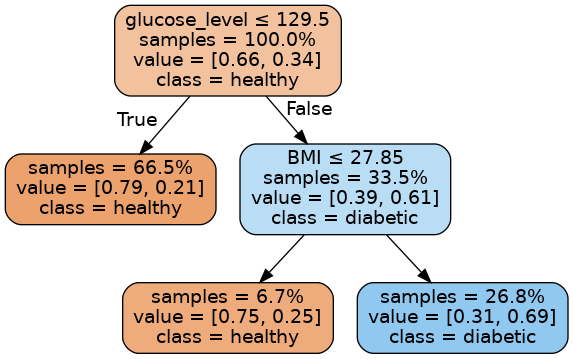

In [45]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


dot_data = StringIO()


export_graphviz(decision_tree, out_file=dot_data,
                filled=True, rounded=True,impurity=False, proportion=True,precision=2,
                special_characters=True, feature_names = predictors.columns,class_names=['healthy','diabetic'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

If a person has BMI <= 26.3 and glucose_level <= 129.5,  97% are healthy and 3% has diabetes.
If a person has BMI > 26.3 and glucose_level <= 129.5, 73% are healthy and 27% has diabetes.
If a person has BMI <= 27.85 and glucose_level > 129.5, 75% are healthy and 25% has diabetes.
If a person has BMI > 27.85 and glucose_levesl > 129.5, 31% are healthy and 69% has diabetes.

66% of the persons have Glucose level <= 129.5, while 34% have > 129.5.


66% of the people with an glucose level of 129.5 or lower are healthy with no diabetic symptoms. 

In [46]:
prediction = decision_tree.predict(predictors_test)
# Code - explained: 
# I know that our decision tree model includes a "predict" command for forecasting.
# could you give it the predictors_test table as a parameter.
# could you then slip the resulting predictions (whether diabetes or not) into a variable called prediction 

from sklearn import metrics 
# I know the sklearn library contains a tool called "metrics"
# I would like to import it for my use so I can measure the accuracy of my model 

accuracy = metrics.accuracy_score(target_test, prediction)
# I know that "metrics" contains also "accuracy_score" which compares the prediction to the correct results.
# could you give it the predictor variables reserved for testing as parameters as well as the prediction itself.
# would you slip the end result into a variable called "accuracy" 

print("accuracy_score:",accuracy)
# voisitko tulostaa kirjekuoren "tarkkuus" sisällön
# Could you please print the content of the variable "accuracy"


accuracy_score: 0.7575757575757576


In [48]:
len(prediction)

231

In [49]:
confusion_matrix = metrics.confusion_matrix(target_test, prediction)
# Code - Explained : I know that "metrics" contains the command "confusion_matrix" which compares the prediction with the correct results
# I would like to give the target variable and the prediction as a parameter
# could you slip the result into a variable called a "confusion_matrix" 

print(confusion_matrix)

[[127  19]
 [ 37  48]]


In [50]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    
    # plt.cm.Oranges .. eli muitakin varivaihtoehtoja loytyy
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('Truth', size = 18)
    plt.xlabel('Prediction', size = 18)

Confusion matrix, without normalization
[[127  19]
 [ 37  48]]


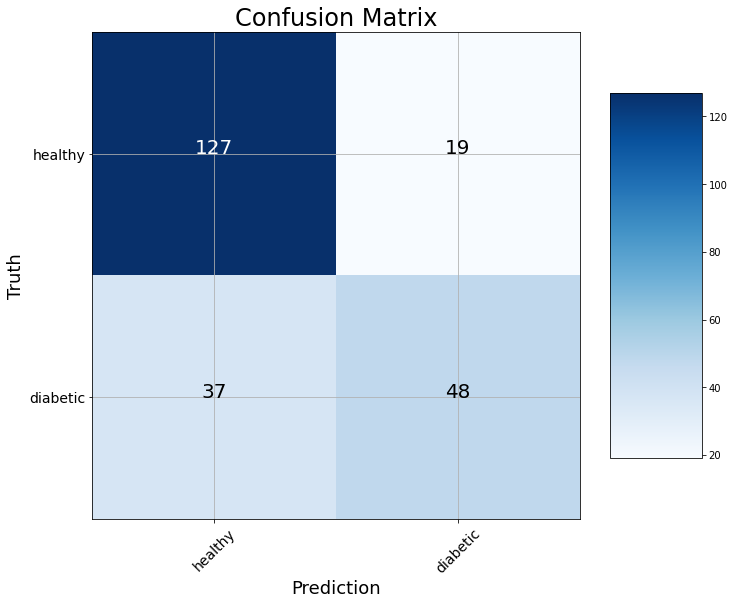

In [51]:
cm = confusion_matrix(target_test, prediction)
plot_confusion_matrix(cm, classes = ['healthy', 'diabetic'],
                      normalize = False,
                      title = 'Confusion Matrix')